# New Cluster


# Simulation pyMC


In [6]:
import pymc as pm
from jax import random
import jax.numpy as jnp
import numpy as np
import pickle
key = random.PRNGKey(0)
from jax import random, jit, vmap
import os
path = os.getcwd()
print("Old path:", path)
path+='/ABC-SBI'
path = (path.split('/'))
if path.index("ABC-SBI")==-1:
    path.append('ABC-SBI')
    
path = path[:path.index("ABC-SBI")+1]
path = '/'.join(path)
print("New path:", path)
os.chdir(path)

import sys
sys.path.append(path)
from functions.simulation import get_dataset
from functions.training import train_loop
from functions.SBC import SBC_epsilon, plot_SBC, find_grid_explorative, post_pdf_z
import jax.numpy as jnp
import time
import pickle 
import lzma
from jax.scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pytensor

@jit
def prior_simulator(key):
    return random.normal(key, (1,))*SIGMA0 + MU0


def data_simulator_raw(key, beta, x_design, index_beta):
    key, subkey = random.split(key)
    betas = jnp.insert(random.normal(subkey, (x_design.shape[1]-1,))*SIGMA0 + MU0, index_beta, beta)
    return random.normal(key, (x_design.shape[0],))*SIGMA+ jnp.dot(x_design, betas)

def beta_simulator_raw(key, beta, x_design, index_beta):
    return jnp.insert(random.normal(key, (x_design.shape[1]-1,))*SIGMA0 + MU0, index_beta, beta)

@jit
def discrepancy(y, y_true):
    return jnp.mean((y-y_true)**2)


def x_design_simulator(key, n_data, n_var):
    return random.normal(key, (n_data, n_var))
N_DATA = 500

MU0, SIGMA0 = 0., 10.
PRIOR_ARGS = [MU0, SIGMA0]

SIGMA = 1.





PATH_RESULTS = os.getcwd() + f"/examples/Linear-Reg/plots_for_paper/"
if not os.path.exists(PATH_RESULTS):
    os.makedirs(PATH_RESULTS)
    


ACCEPT_RATES = [1., .95, .9, .75]

N_VARS = [2,3,5,10,25,50]
for N_VAR in N_VARS:
    key = random.PRNGKey(0)
    key, key_beta = random.split(key)
    TRUE_BETAS  = (random.normal(key_beta, (N_VAR,))*SIGMA0 + MU0)
    TRUE_BETAS = TRUE_BETAS[jnp.argsort(jnp.abs(TRUE_BETAS))[::-1]]
       
    key, key_design = random.split(key)
    X_DESIGN = x_design_simulator(key_design, N_DATA, N_VAR)
    
    MODEL_ARGS = [SIGMA, X_DESIGN]
    key, key_data = random.split(key)
    TRUE_DATA = random.normal(key_data, (N_DATA,))*SIGMA + jnp.dot(X_DESIGN, TRUE_BETAS)
    
    PATH_N_VAR = PATH_RESULTS+ "K_{}/".format(N_VAR)
    if not os.path.exists(PATH_N_VAR):
        os.makedirs(PATH_N_VAR)
        
        
    trace_path = PATH_N_VAR + "data.pkl"
    
    if not os.path.exists(trace_path):
        with pm.Model() as model:
            # Convert X_DESIGN to a tensor variable
            X_DESIGN_shared = np.array(X_DESIGN)
            # Priors for unknown model parameters
            betas = pm.Normal('betas', mu=MU0, sigma=SIGMA0, shape=N_VAR)
            # Likelihood (sampling distribution) of observations
            y_obs = pm.Normal('y_obs', mu=pytensor.tensor.dot(X_DESIGN_shared, betas), sigma=SIGMA, observed=TRUE_DATA)
            # Sample from the posterior
            trace = pm.sample(1000, tune=1000)
        beta_post = np.array(trace.posterior.betas).reshape(-1, N_VAR)

        dico = {"X_DESIGN":X_DESIGN, "TRUE_DATA":TRUE_DATA, "TRUE_BETAS":TRUE_BETAS, "true_post":beta_post}
        with open(trace_path, "wb") as f:
            pickle.dump(dico, f)
    else:
        with open(trace_path, "rb") as f:
            dico = pickle.load(f)



Old path: /Users/antoineluciano/Documents/Recherche/ABC-SBI
New path: /Users/antoineluciano/Documents/Recherche/ABC-SBI


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas]
/Users/antoineluciano/.pyenv/versions/3.10.13/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/Users/antoineluciano/.pyenv/versions/3.10.13/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas]
/Users/antoineluciano/.pyenv/versions/3.10.13/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/Users/antoineluciano/.pyenv/versions/3.10.13/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas]
/Users/antoineluciano/.pyenv/versions/3.10.13/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/Users/antoineluciano/.pyenv/versions/3.10.13/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas]
/Users/antoineluciano/.pyenv/versions/3.10.13/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/Users/antoineluciano/.pyenv/versions/3.10.13/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas]
/Users/antoineluciano/.pyenv/versions/3.10.13/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas]
/Users/antoineluciano/.pyenv/versions/3.10.13/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/Users/antoineluciano/.pyenv/versions/3.10.13/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


Old path: /Users/antoineluciano/Documents/Recherche/ABC-SBI
New path: /Users/antoineluciano/Documents/Recherche/ABC-SBI


--------------------
K = 2, TRUE_BETA = max, ACCEPT_RATE = 1.0
--------------------


Selection of epsilon star...
Distances: min =  1.9113224 max =  2001.7218 mean =  245.42914 std =  242.25162
Time to select epsilon star: 2.41s

Simulations of the testing dataset...
Time to simulate the testing dataset: 2.85s

Simulations of the training dataset...
Time to simulate the training dataset: 12.58s

Training the neural network...
Initial accuracy: 49.41%, Initial test accuracy: 49.48%
Training for 3 epochs...
Epoch 1/3, mean train accuracy: 73.65%, mean test accuracy: 52.65%, lr scale: 1.0 in 14.83 sec
Epoch 2/3, mean train accuracy: 89.64%, mean test accuracy: 95.93%, lr scale: 1.0 in 13.85 sec
Epoch 3/3, mean train accuracy: 93.78%, mean test accuracy: 97.08%, lr scale: 1.0 in 13.19 sec
Time to train the neural network: 62.16s

Simulation Based Calibration...


100%|██████████| 1600/1600 [03:13<00:00,  8.25it/s]


Time to perform SBC: 195.95s

Data saved in  /Users/antoineluciano/Documents/Recherche/ABC-SBI/examples/Linear-Reg/new_results_500/K_2/beta_max/pickles/LinearReg_K_2_beta_max_acc_1.0_eps_inf.xz


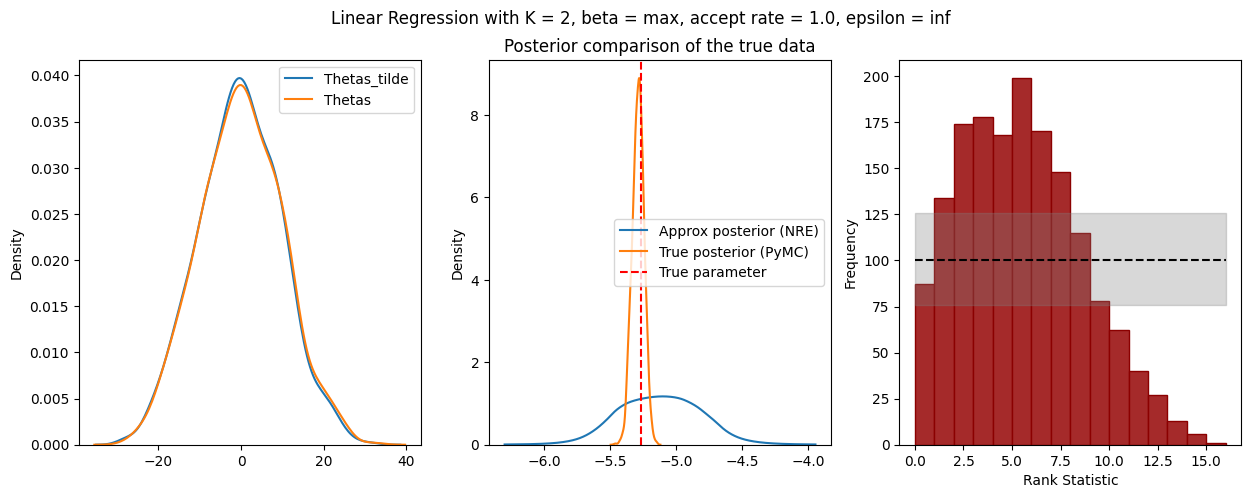



--------------------
ITERATION (ACC = 1.0) DONE IN 280.25905418395996 SECONDS!
--------------------




--------------------
K = 2, TRUE_BETA = max, ACCEPT_RATE = 0.999
--------------------


Selection of epsilon star...
Distances: min =  2.0948222 max =  2310.8052 mean =  243.78912 std =  236.9527
epsilon:  1088.929443359375 acceptance rate:  0.9928
Time to select epsilon star: 2.15s

Simulations of the testing dataset...
Time to simulate the testing dataset: 2.53s

Simulations of the training dataset...
Time to simulate the training dataset: 19.26s

Training the neural network...
Initial accuracy: 50.07%, Initial test accuracy: 49.96%
Training for 3 epochs...
Epoch 1/3, mean train accuracy: 79.43%, mean test accuracy: 74.51%, lr scale: 1.0 in 20.10 sec
Epoch 2/3, mean train accuracy: 88.81%, mean test accuracy: 94.02%, lr scale: 1.0 in 13.95 sec
Epoch 3/3, mean train accuracy: 90.89%, mean test accuracy: 94.92%, lr scale: 1.0 in 17.44 sec
Time to train the neural network: 76.33s

S

100%|██████████| 1600/1600 [03:00<00:00,  8.88it/s]


Time to perform SBC: 182.05s

Data saved in  /Users/antoineluciano/Documents/Recherche/ABC-SBI/examples/Linear-Reg/new_results_500/K_2/beta_max/pickles/LinearReg_K_2_beta_max_acc_0.999_eps_1.09e+03.xz


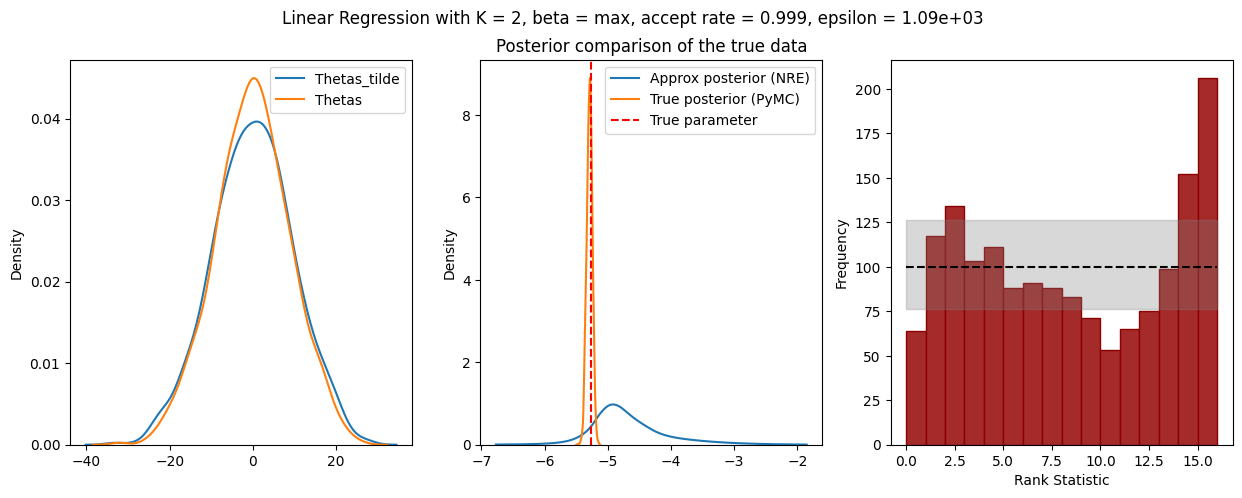



--------------------
ITERATION (ACC = 0.999) DONE IN 283.9008860588074 SECONDS!
--------------------




--------------------
K = 2, TRUE_BETA = max, ACCEPT_RATE = 0.99
--------------------


Selection of epsilon star...
epsilon:  931.9755249023438 acceptance rate:  0.9867
Time to select epsilon star: 1.44s

Simulations of the testing dataset...
Time to simulate the testing dataset: 2.02s

Simulations of the training dataset...
Time to simulate the training dataset: 18.02s

Training the neural network...
Initial accuracy: 49.74%, Initial test accuracy: 49.95%
Training for 3 epochs...
Epoch 1/3, mean train accuracy: 76.06%, mean test accuracy: 90.79%, lr scale: 1.0 in 14.79 sec
Epoch 2/3, mean train accuracy: 90.15%, mean test accuracy: 89.61%, lr scale: 1.0 in 14.02 sec
Epoch 3/3, mean train accuracy: 89.58%, mean test accuracy: 91.46%, lr scale: 1.0 in 24.10 sec
Time to train the neural network: 69.94s

Simulation Based Calibration...


100%|██████████| 1600/1600 [03:26<00:00,  7.76it/s]


Time to perform SBC: 207.81s

Data saved in  /Users/antoineluciano/Documents/Recherche/ABC-SBI/examples/Linear-Reg/new_results_500/K_2/beta_max/pickles/LinearReg_K_2_beta_max_acc_0.99_eps_9.32e+02.xz


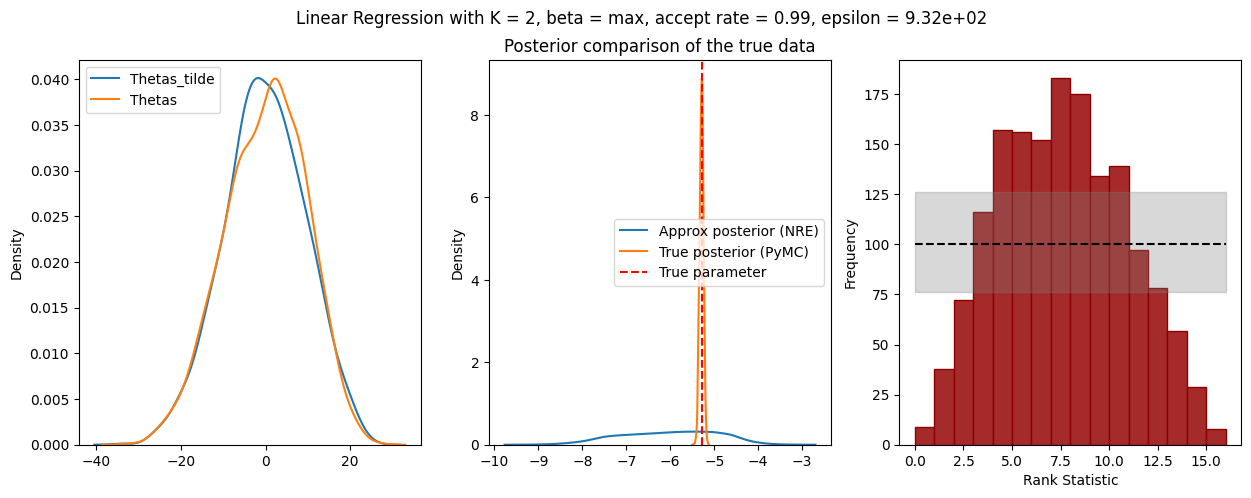



--------------------
ITERATION (ACC = 0.99) DONE IN 300.6772539615631 SECONDS!
--------------------




--------------------
K = 2, TRUE_BETA = max, ACCEPT_RATE = 0.95
--------------------


Selection of epsilon star...
epsilon:  839.5386352539062 acceptance rate:  0.98139995
epsilon:  772.39697265625 acceptance rate:  0.97169995
epsilon:  723.5912475585938 acceptance rate:  0.96989995
epsilon:  675.561767578125 acceptance rate:  0.9647
epsilon:  641.242919921875 acceptance rate:  0.9614
epsilon:  613.5714111328125 acceptance rate:  0.95129997
epsilon:  584.6490478515625 acceptance rate:  0.94579995
Time to select epsilon star: 9.96s

Simulations of the testing dataset...
Time to simulate the testing dataset: 2.39s

Simulations of the training dataset...
Time to simulate the training dataset: 21.66s

Training the neural network...
Initial accuracy: 49.03%, Initial test accuracy: 49.18%
Training for 3 epochs...
Epoch 1/3, mean train accuracy: 78.58%, mean test accuracy: 89.37%, lr sca

100%|██████████| 1600/1600 [02:48<00:00,  9.50it/s]


Time to perform SBC: 169.72s

Data saved in  /Users/antoineluciano/Documents/Recherche/ABC-SBI/examples/Linear-Reg/new_results_500/K_2/beta_max/pickles/LinearReg_K_2_beta_max_acc_0.95_eps_5.85e+02.xz


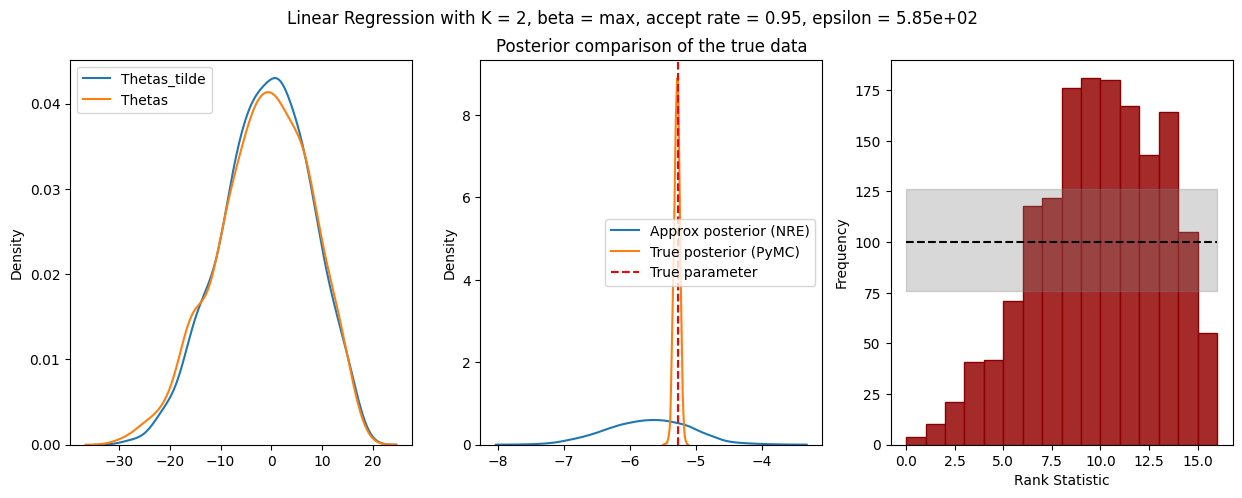



--------------------
ITERATION (ACC = 0.95) DONE IN 259.1828501224518 SECONDS!
--------------------




--------------------
K = 2, TRUE_BETA = max, ACCEPT_RATE = 0.925
--------------------


Selection of epsilon star...
epsilon:  563.6951293945312 acceptance rate:  0.9429
epsilon:  540.4182739257812 acceptance rate:  0.93369997
epsilon:  518.59716796875 acceptance rate:  0.9267
epsilon:  504.04193115234375 acceptance rate:  0.9252
epsilon:  488.3414001464844 acceptance rate:  0.91349995
Time to select epsilon star: 9.37s

Simulations of the testing dataset...
Time to simulate the testing dataset: 2.35s

Simulations of the training dataset...
Time to simulate the training dataset: 25.01s

Training the neural network...
Initial accuracy: 50.16%, Initial test accuracy: 50.11%
Training for 3 epochs...
Epoch 1/3, mean train accuracy: 75.84%, mean test accuracy: 95.12%, lr scale: 1.0 in 13.58 sec
Epoch 2/3, mean train accuracy: 90.66%, mean test accuracy: 95.93%, lr scale: 1.0 in 13.02 se

 23%|██▎       | 369/1600 [00:41<02:19,  8.82it/s]


KeyboardInterrupt: 

In [ ]:
from jax import random, jit, vmap
import os
path = os.getcwd()
print("Old path:", path)
path+='/ABC-SBI'
path = (path.split('/'))
if path.index("ABC-SBI")==-1:
    path.append('ABC-SBI')
    
path = path[:path.index("ABC-SBI")+1]
path = '/'.join(path)
print("New path:", path)
os.chdir(path)

import sys
sys.path.append(path)
from functions.simulation import get_dataset, get_epsilon_star
from functions.training import train_loop
from functions.SBC import SBC_epsilon, plot_SBC, find_grid_explorative, post_pdf_z
import jax.numpy as jnp
import time
import pickle 
import lzma
from jax.scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pytensor

@jit
def prior_simulator(key):
    return random.normal(key, (1,))*SIGMA0 + MU0


def data_simulator_raw(key, beta, x_design, index_beta):
    key, subkey = random.split(key)
    betas = jnp.insert(random.normal(subkey, (x_design.shape[1]-1,))*SIGMA0 + MU0, index_beta, beta)
    return random.normal(key, (x_design.shape[0],))*SIGMA+ jnp.dot(x_design, betas)

def beta_simulator_raw(key, beta, x_design, index_beta):
    return jnp.insert(random.normal(key, (x_design.shape[1]-1,))*SIGMA0 + MU0, index_beta, beta)

@jit
def discrepancy(y, y_true):
    return jnp.mean((y-y_true)**2)


def x_design_simulator(key, n_data, n_var):
    return random.normal(key, (n_data, n_var))


key = random.PRNGKey(0)

N_DATA = 500

MU0, SIGMA0 = 0., 10.
PRIOR_ARGS = [MU0, SIGMA0]

SIGMA = 1.



PRIOR_LOGPDF = lambda x: norm.logpdf(x, loc = MU0, scale = SIGMA0)
MINN, MAXX = norm.ppf(1e-5, loc = MU0, scale = SIGMA0), norm.ppf(1-1e-5, loc = MU0, scale = SIGMA0)
    



N_POINTS_TRAIN = 1000000
N_POINTS_TEST = 100000
N_POINTS_EPS = 10000
sim_args = None


N_EPOCHS = 3
LEARNING_RATE = 0.001
PATIENCE = 7
COOLDOWN = 0
FACTOR = .5
RTOL = 1e-4  
ACCUMULATION_SIZE = 200
LEARNING_RATE_MIN = 1e-6

BATCH_SIZE = 256
NUM_BATCH = 1024
NUM_CLASSES = 2
HIDDEN_SIZE = 256
NUM_LAYERS = 7
WDECAY = .001
N_GRID_FINAL = 10000
N_GRID_EXPLO = 1000

PATH_RESULTS = os.getcwd() + f"/examples/Linear-Reg/plots_for_paper/"
if not os.path.exists(PATH_RESULTS):
    os.makedirs(PATH_RESULTS)
    

ACCEPT_RATES = [1., .999, .99, .95, .925, .9, .85, .8, .75]

N_VARS = [2,3,5,10,25,50]
for N_VAR in N_VARS:
    key = random.PRNGKey(0)
    PATH_N_VAR = PATH_RESULTS+ "K_{}/".format(N_VAR)
    with open(PATH_N_VAR + "data.pkl", "rb") as f:
        dico = pickle.load(f)
    TRUE_BETAS = dico["TRUE_BETAS"]
    X_DESIGN = dico["X_DESIGN"]
    TRUE_DATA = dico["TRUE_DATA"]
    beta_post = dico["true_post"]
    MODEL_ARGS = [SIGMA, X_DESIGN]
    if N_VAR > 2:
        INDEX_BETAS = [0, N_VAR-1, N_VAR//2]
    else: 
        INDEX_BETAS = [0, N_VAR-1]
    for INDEX_BETA in INDEX_BETAS:
        data_simulator = jit(lambda key, beta: data_simulator_raw(key, beta, X_DESIGN, INDEX_BETA)) 
        TRUE_BETA = TRUE_BETAS[INDEX_BETA]
        if INDEX_BETA == 0:
            beta_mode = "max"
            PATH_BETA = PATH_N_VAR + "beta_max/"
        elif INDEX_BETA == N_VAR-1:
            beta_mode = "min"
            PATH_BETA = PATH_N_VAR + "beta_min/"
        else:
            beta_mode = "random"
            PATH_BETA = PATH_N_VAR + "beta_random/"
        if not os.path.exists(PATH_BETA):
                os.makedirs(PATH_BETA)
    
    
        EPSILON_STAR = jnp.inf

        
        for ACCEPT_RATE in ACCEPT_RATES:
            print("\n\n--------------------")
            print("K = {}, TRUE_BETA = {}, ACCEPT_RATE = {}".format(N_VAR, beta_mode, ACCEPT_RATE))
            print("--------------------\n\n")
            
            time_eps = time.time()
            print("Selection of epsilon star...")
            EPSILON_STAR, key = get_epsilon_star(key, ACCEPT_RATE, N_POINTS_EPS, prior_simulator, data_simulator, discrepancy, TRUE_DATA, quantile_rate = .99, epsilon = EPSILON_STAR)
            print('Time to select epsilon star: {:.2f}s\n'.format(time.time()-time_eps))

            print("Simulations of the testing dataset...")
            time_sim = time.time()
            X_test, y_test, key = get_dataset(key, N_POINTS_TEST, prior_simulator, data_simulator, discrepancy, EPSILON_STAR, TRUE_DATA)
            print('Time to simulate the testing dataset: {:.2f}s\n'.format(time.time()-time_sim))

            print("Simulations of the training dataset...")
            time_sim = time.time()
            X_train, y_train, key = get_dataset(key, N_POINTS_TRAIN, prior_simulator, data_simulator, discrepancy, EPSILON_STAR, TRUE_DATA)
            print('Time to simulate the training dataset: {:.2f}s\n'.format(time.time()-time_sim))


            print("Training the neural network...")
            time_nn = time.time()
            params, train_accuracy, train_losses, test_accuracy, test_losses, key = train_loop(key, N_EPOCHS, NUM_LAYERS, HIDDEN_SIZE, NUM_CLASSES, BATCH_SIZE, NUM_BATCH, LEARNING_RATE, WDECAY, PATIENCE, COOLDOWN, FACTOR, RTOL, ACCUMULATION_SIZE, LEARNING_RATE_MIN, prior_simulator, data_simulator, discrepancy, true_data = TRUE_DATA, X_train = X_train, y_train = y_train, X_test = X_test, y_test =  y_test, N_POINTS_TRAIN = N_POINTS_TRAIN, N_POINTS_TEST = N_POINTS_TEST, epsilon = EPSILON_STAR, verbose = True)
            print('Time to train the neural network: {:.2f}s\n'.format(time.time()-time_nn))


            print("Simulation Based Calibration...")
            time_sbc = time.time()

            ranks, thetas_tilde, thetas, key = SBC_epsilon(key = key, N_SBC = N_SBC, L = L, params = params, epsilon = EPSILON_STAR, true_data = TRUE_DATA, prior_simulator = prior_simulator, prior_logpdf = PRIOR_LOGPDF, data_simulator = data_simulator, discrepancy = discrepancy, n_grid_explo = N_GRID_EXPLO, n_grid_final = N_GRID_FINAL, minn = MINN, maxx = MAXX)

            print('Time to perform SBC: {:.2f}s\n'.format(time.time()-time_sbc))


            pickle_dico = {"ACCEPT_RATE":ACCEPT_RATE, "ranks": ranks, "thetas_tilde": thetas_tilde, "thetas": thetas, "epsilon":EPSILON_STAR, "KEY":key, "N_SBC":N_SBC, "L":L, "N_GRID_EXPLO": N_GRID_EXPLO, 'N_GRID_FINAL': N_GRID_FINAL,"TRUE_DATA": TRUE_DATA, "TRUE_THETA": TRUE_BETA, "TRUE_BETAS": TRUE_BETAS, "params": params, "train_accuracy":train_accuracy, "test_accuracy":test_accuracy, "MODEL_ARGS":MODEL_ARGS, "PRIOR_ARGS":PRIOR_ARGS, "N_POINTS_TRAIN":N_POINTS_TRAIN, "N_POINTS_TEST":N_POINTS_TEST, "N_DATA":N_DATA, "N_EPOCHS":N_EPOCHS, "LEARNING_RATE":LEARNING_RATE, "PATIENCE":PATIENCE, "COOLDOWN":COOLDOWN, "FACTOR":FACTOR, "RTOL":RTOL, "ACCUMULATION_SIZE":ACCUMULATION_SIZE, "LEARNING_RATE_MIN":LEARNING_RATE_MIN, "BATCH_SIZE":BATCH_SIZE, "NUM_BATCH":NUM_BATCH, "NUM_CLASSES":NUM_CLASSES, "HIDDEN_SIZE":HIDDEN_SIZE, "NUM_LAYERS":NUM_LAYERS, "WDECAY":WDECAY}


            NAME = "LinearReg_K_{}_beta_{}_acc_{}_eps_{:.3}".format(N_VAR, beta_mode, ACCEPT_RATE, EPSILON_STAR)
            NAMEFIG = PATH_BETA + "figures/" + NAME + ".png"
            NAMEFILE = PATH_BETA + "pickles/" + NAME + ".xz"
            
            
            if not os.path.exists(PATH_BETA + "figures/"):
                os.makedirs(PATH_BETA + "figures/")
            if not os.path.exists(PATH_BETA + "pickles/"):
                os.makedirs(PATH_BETA + "pickles/")
                
            
            with lzma.open(NAMEFILE, "wb") as f:
                pickle.dump(pickle_dico, f)
            print("Data saved in ", NAMEFILE)

            title = "Linear Regression with K = {}, beta = {}, accept rate = {}, epsilon = {:.3}".format(N_VAR, beta_mode, ACCEPT_RATE, EPSILON_STAR)

            
            f, ax = plt.subplots(1,3, figsize = (15,5))
            sns.kdeplot(thetas_tilde, label = "Thetas_tilde", ax = ax[0])
            sns.kdeplot(thetas[:,0], label = "Thetas", ax = ax[0])

            ax[0].legend()
            f.suptitle(f'{title}')

            grid_approx, pdf_approx = find_grid_explorative(lambda x: post_pdf_z(params, x, TRUE_DATA, PRIOR_LOGPDF), N_GRID_EXPLO, N_GRID_FINAL, MINN, MAXX)

            
            Z_approx = np.trapz(pdf_approx, grid_approx)
            ax[1].plot(grid_approx, pdf_approx/Z_approx, label = "Approx posterior (NRE)")
            sns.kdeplot(beta_post[:,INDEX_BETA], label = "True posterior (PyMC)", ax = ax[1])
            ax[1].axvline(TRUE_BETA, color = "red", label = "True parameter", linestyle = "--")
            # ax[1].plot(grid_true, pdf_true, label = "True")
            ax[1].legend()
            ax[1].set_title("Posterior comparison of the true data")
            plot_SBC(ranks, L, B, ax = ax[2])
            ax[2].set_title("SBC with Rank Statistics")
            f.savefig(NAMEFIG)
            plt.close(f)
            
            
            
            
            
            print("\n\n--------------------")
            print("ITERATION (ACC = {}) DONE IN {} SECONDS!".format(ACCEPT_RATE, time.time()-time_eps))
            print("--------------------\n\n")